In [35]:
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [36]:
data=pd.read_csv("C:\\Users\\lenovo\\OneDrive\\data science\\assignment\\SVM\\forestfires.csv")
data

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [38]:
data['month']=data['month'].astype('category')
data['day']=data['day'].astype('category')

In [39]:
data['month']=data['month'].cat.codes
data['day']=data['day'].cat.codes

In [40]:
data.dtypes

month               int8
day                 int8
FFMC             float64
DMC              float64
DC               float64
ISI              float64
temp             float64
RH                 int64
wind             float64
rain             float64
area             float64
dayfri             int64
daymon             int64
daysat             int64
daysun             int64
daythu             int64
daytue             int64
daywed             int64
monthapr           int64
monthaug           int64
monthdec           int64
monthfeb           int64
monthjan           int64
monthjul           int64
monthjun           int64
monthmar           int64
monthmay           int64
monthnov           int64
monthoct           int64
monthsep           int64
size_category     object
dtype: object

In [41]:
data.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [42]:
data.duplicated().sum()

8

In [43]:
data.drop_duplicates()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,1,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,1,3,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,1,3,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,1,2,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [44]:
data=data.drop(columns=['month','day'],axis=1)

In [60]:
data.size_category.value_counts()

small    378
large    139
Name: size_category, dtype: int64

In [45]:
data.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [54]:
data.boxplot(figsize=(15,12))
plt.show()

<AxesSubplot:>

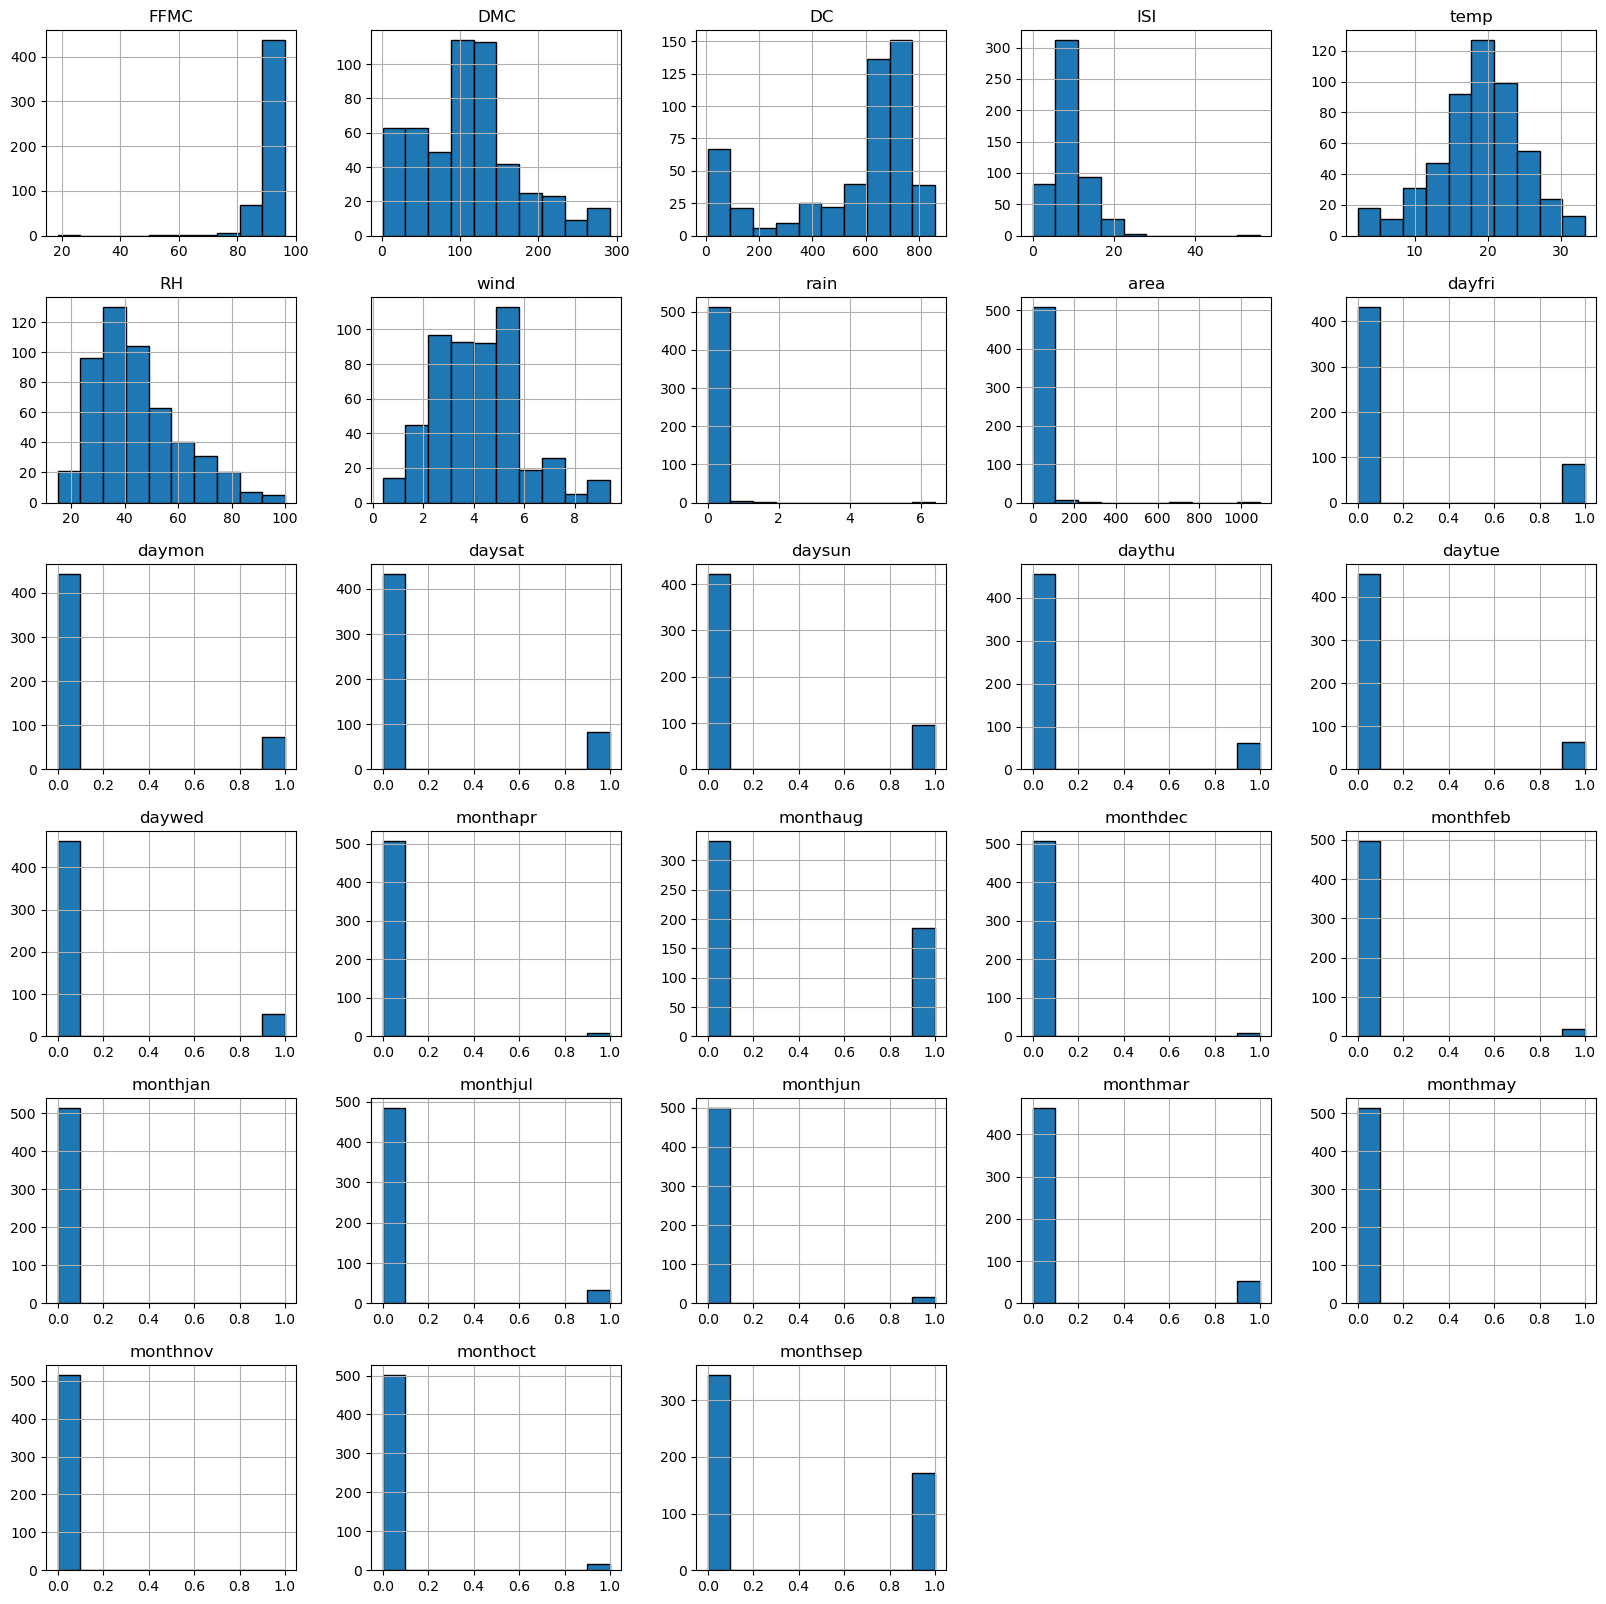

In [47]:
data.hist(edgecolor='black',figsize=(20,20),linewidth=1) 
plt.show()

In [48]:
corr=data.corr()
corr

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
FFMC,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,0.040122,0.019306,...,-0.137044,-0.281535,-0.454771,0.031833,-0.040634,-0.074327,-0.037230,-0.088964,-0.005998,0.076609
DMC,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,0.072994,-0.012010,...,-0.176301,-0.317899,-0.105647,-0.001946,-0.050403,-0.407404,-0.081980,-0.074218,-0.187632,0.110907
DC,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,0.049383,-0.004220,...,-0.105642,-0.399277,-0.115064,-0.100887,-0.186183,-0.650427,-0.114209,-0.078380,0.093279,0.531857
ISI,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,0.008258,0.046695,...,-0.162322,-0.249777,-0.103588,0.020982,0.111516,-0.143520,-0.060493,-0.076559,-0.071154,-0.068877
temp,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,0.097844,-0.071949,...,-0.329648,-0.320015,-0.146520,0.142588,0.051015,-0.341797,-0.045540,-0.053798,-0.053513,0.088006
RH,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751,-0.075519,0.064506,...,-0.047714,0.140430,0.170923,0.013185,0.009382,-0.089836,0.086822,-0.035885,-0.072334,-0.062596
wind,-0.028485,-0.105342,-0.203466,0.106826,-0.227116,0.069410,1.000000,0.061119,0.012317,0.118090,...,0.269702,-0.029431,-0.070245,-0.040645,0.012124,0.181433,0.015054,0.011864,-0.053850,-0.181476
rain,0.056702,0.074790,0.035861,0.067668,0.069491,0.099751,0.061119,1.000000,-0.007366,-0.004261,...,-0.009752,-0.014698,-0.004566,-0.013390,-0.013510,-0.020744,-0.004566,-0.003225,-0.012665,-0.051733
area,0.040122,0.072994,0.049383,0.008258,0.097844,-0.075519,0.012317,-0.007366,1.000000,-0.052911,...,0.001010,-0.020732,-0.012589,0.006149,-0.020314,-0.045596,0.006264,-0.008893,-0.016878,0.056573
dayfri,0.019306,-0.012010,-0.004220,0.046695,-0.071949,0.064506,0.118090,-0.004261,-0.052911,1.000000,...,-0.019140,0.046323,-0.027643,-0.048969,0.006000,0.036205,0.056423,-0.019527,-0.045585,0.107671


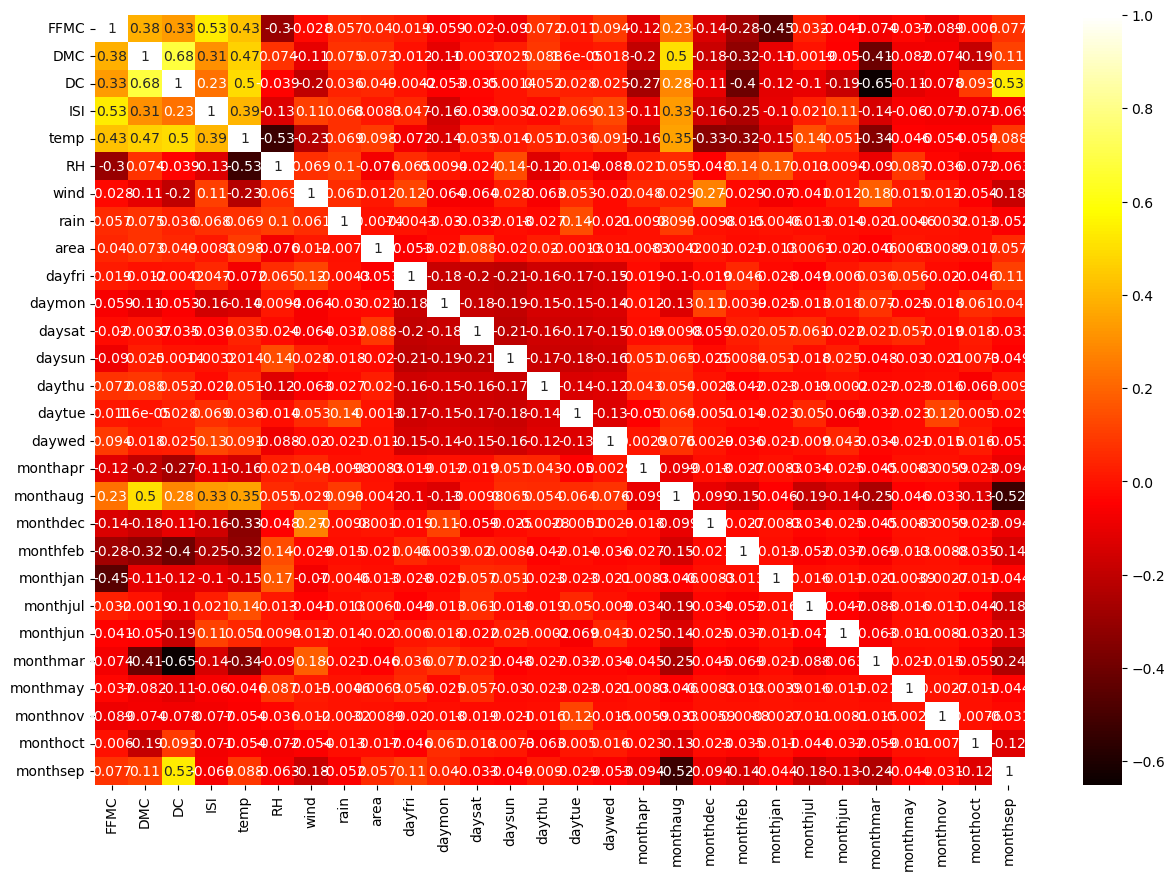

In [49]:
fig=plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True,cmap='hot')
plt.show()

In [109]:
x=data.iloc[:,:28]
y=data.size_category

In [51]:
# train test split

In [56]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [57]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

In [58]:
model=SVC()
model.fit(x_train,y_train)

SVC()

In [59]:
score=model.score(x_train,y_train)
score

0.7966101694915254

In [65]:
y_pred=model.predict(x_test)

In [66]:
print(np.mean(y_pred==y_test))

0.7692307692307693


In [68]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

In [69]:
R_model=SVC()
param_grid=[{'kernel':['linear','rbf','poly','sigmoid'],'gamma':[0.5,0.1,0.01],'C':[10,0.1,0.001,0.0001] }]
grid_cv=GridSearchCV(R_model,param_grid,verbose=300)
grid_cv.fit(x_train,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5; 1/48] START C=10, gamma=0.5, kernel=linear.............................
[CV 1/5; 1/48] END C=10, gamma=0.5, kernel=linear;, score=0.940 total time=   0.0s
[CV 2/5; 1/48] START C=10, gamma=0.5, kernel=linear.............................
[CV 2/5; 1/48] END C=10, gamma=0.5, kernel=linear;, score=0.904 total time=   0.0s
[CV 3/5; 1/48] START C=10, gamma=0.5, kernel=linear.............................
[CV 3/5; 1/48] END C=10, gamma=0.5, kernel=linear;, score=1.000 total time=   0.0s
[CV 4/5; 1/48] START C=10, gamma=0.5, kernel=linear.............................
[CV 4/5; 1/48] END C=10, gamma=0.5, kernel=linear;, score=0.988 total time=   0.0s
[CV 5/5; 1/48] START C=10, gamma=0.5, kernel=linear.............................
[CV 5/5; 1/48] END C=10, gamma=0.5, kernel=linear;, score=0.963 total time=   0.0s
[CV 1/5; 2/48] START C=10, gamma=0.5, kernel=rbf................................
[CV 1/5; 2/48] END .C=10, gamma=0.5, 

[CV 3/5; 16/48] END C=0.1, gamma=0.5, kernel=sigmoid;, score=0.771 total time=   0.0s
[CV 4/5; 16/48] START C=0.1, gamma=0.5, kernel=sigmoid..........................
[CV 4/5; 16/48] END C=0.1, gamma=0.5, kernel=sigmoid;, score=0.768 total time=   0.0s
[CV 5/5; 16/48] START C=0.1, gamma=0.5, kernel=sigmoid..........................
[CV 5/5; 16/48] END C=0.1, gamma=0.5, kernel=sigmoid;, score=0.732 total time=   0.0s
[CV 1/5; 17/48] START C=0.1, gamma=0.1, kernel=linear...........................
[CV 1/5; 17/48] END C=0.1, gamma=0.1, kernel=linear;, score=0.843 total time=   0.0s
[CV 2/5; 17/48] START C=0.1, gamma=0.1, kernel=linear...........................
[CV 2/5; 17/48] END C=0.1, gamma=0.1, kernel=linear;, score=0.843 total time=   0.0s
[CV 3/5; 17/48] START C=0.1, gamma=0.1, kernel=linear...........................
[CV 3/5; 17/48] END C=0.1, gamma=0.1, kernel=linear;, score=0.855 total time=   0.0s
[CV 4/5; 17/48] START C=0.1, gamma=0.1, kernel=linear...........................
[

[CV 1/5; 28/48] END C=0.001, gamma=0.5, kernel=sigmoid;, score=0.735 total time=   0.0s
[CV 2/5; 28/48] START C=0.001, gamma=0.5, kernel=sigmoid........................
[CV 2/5; 28/48] END C=0.001, gamma=0.5, kernel=sigmoid;, score=0.735 total time=   0.0s
[CV 3/5; 28/48] START C=0.001, gamma=0.5, kernel=sigmoid........................
[CV 3/5; 28/48] END C=0.001, gamma=0.5, kernel=sigmoid;, score=0.723 total time=   0.0s
[CV 4/5; 28/48] START C=0.001, gamma=0.5, kernel=sigmoid........................
[CV 4/5; 28/48] END C=0.001, gamma=0.5, kernel=sigmoid;, score=0.732 total time=   0.0s
[CV 5/5; 28/48] START C=0.001, gamma=0.5, kernel=sigmoid........................
[CV 5/5; 28/48] END C=0.001, gamma=0.5, kernel=sigmoid;, score=0.732 total time=   0.0s
[CV 1/5; 29/48] START C=0.001, gamma=0.1, kernel=linear.........................
[CV 1/5; 29/48] END C=0.001, gamma=0.1, kernel=linear;, score=0.735 total time=   0.0s
[CV 2/5; 29/48] START C=0.001, gamma=0.1, kernel=linear.............

[CV 5/5; 42/48] END C=0.0001, gamma=0.1, kernel=rbf;, score=0.732 total time=   0.0s
[CV 1/5; 43/48] START C=0.0001, gamma=0.1, kernel=poly..........................
[CV 1/5; 43/48] END C=0.0001, gamma=0.1, kernel=poly;, score=0.735 total time=   0.0s
[CV 2/5; 43/48] START C=0.0001, gamma=0.1, kernel=poly..........................
[CV 2/5; 43/48] END C=0.0001, gamma=0.1, kernel=poly;, score=0.735 total time=   0.0s
[CV 3/5; 43/48] START C=0.0001, gamma=0.1, kernel=poly..........................
[CV 3/5; 43/48] END C=0.0001, gamma=0.1, kernel=poly;, score=0.723 total time=   0.0s
[CV 4/5; 43/48] START C=0.0001, gamma=0.1, kernel=poly..........................
[CV 4/5; 43/48] END C=0.0001, gamma=0.1, kernel=poly;, score=0.732 total time=   0.0s
[CV 5/5; 43/48] START C=0.0001, gamma=0.1, kernel=poly..........................
[CV 5/5; 43/48] END C=0.0001, gamma=0.1, kernel=poly;, score=0.732 total time=   0.0s
[CV 1/5; 44/48] START C=0.0001, gamma=0.1, kernel=sigmoid.......................

GridSearchCV(estimator=SVC(),
             param_grid=[{'C': [10, 0.1, 0.001, 0.0001],
                          'gamma': [0.5, 0.1, 0.01],
                          'kernel': ['linear', 'rbf', 'poly', 'sigmoid']}],
             verbose=300)

In [70]:
grid_cv.best_params_

{'C': 10, 'gamma': 0.5, 'kernel': 'linear'}

In [82]:
model_2=SVC(kernel='linear',C=10)
model_2.fit(x_train,y_train)

SVC(C=10, kernel='linear')

In [83]:
score=model_2.score(x_train,y_train)
score

0.9854721549636803

In [78]:
y_pred=model_2.predict(x_test)

In [79]:
print(np.mean(y_pred==y_test))

0.9423076923076923


In [84]:
pdata=data.copy()

In [110]:
from sklearn.decomposition import PCA
pca=PCA(n_components=10)
pca_values=pca.fit_transform(x)

In [111]:
var1=np.cumsum(np.round(pca.explained_variance_ratio_,decimals=4)*100)
var1

array([90.71, 96.5 , 99.53, 99.92, 99.96, 99.98, 99.99, 99.99, 99.99,
       99.99])

In [116]:
x=pd.DataFrame(pca_values[:,0:10])
x

,0,1,2,3,4,5,6,7,8,9
0,461.747882,-6.745681,-1.180648,6.739605,1.937306,-3.825971,1.338494,-1.624079,0.294866,-0.235125
1,-105.453927,-21.588227,-95.140985,-5.852586,0.574293,-1.677195,-1.022677,2.646571,-0.764484,-0.149187
2,-124.410859,-21.488527,-90.245649,-5.301114,1.624687,-4.690769,0.863112,2.745948,-0.784618,-0.425099
3,477.039697,-6.565667,11.635404,49.849239,-11.771663,0.531723,-4.363509,0.657234,0.568789,-0.335355
4,449.496000,-5.931726,24.982278,50.931338,-10.383034,4.385633,-4.637417,2.558449,0.369851,0.744087
...,...,...,...,...,...,...,...,...,...,...
512,-105.949764,-13.423921,-74.345829,-8.287919,9.309811,8.731343,-4.339886,-0.760185,-0.998526,0.634040
513,-106.448680,33.518148,-75.873830,31.825481,3.810324,8.494497,-5.490737,-3.604041,-0.900876,0.542858
514,-105.846239,-9.453542,-72.612962,29.999163,4.173032,7.798366,-4.937595,-4.423931,-0.887049,0.538790
515,-71.909933,-11.935210,23.625067,-5.124351,-3.397904,3.201209,-2.398995,-0.598179,-0.413361,-0.523977


In [117]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [118]:
model_3=SVC(kernel='linear',C=10)
model_3.fit(x_train,y_train)

SVC(C=10, kernel='linear')

In [119]:
score=model_3.score(x_train,y_train)
score

1.0

In [120]:
y_pred=model_3.predict(x_test)

In [121]:
print(np.mean(y_pred==y_test))

1.0


In [122]:
kfold=KFold(n_splits=10)
results=cross_val_score(model_3,x_train,y_train,cv=kfold)
print(results.mean())

0.9830429732868758


In [123]:
confusion_matrix=confusion_matrix(y_test, y_pred)

array([[28,  0],
       [ 0, 76]], dtype=int64)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [124]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       large       1.00      1.00      1.00        28
       small       1.00      1.00      1.00        76

    accuracy                           1.00       104
   macro avg       1.00      1.00      1.00       104
weighted avg       1.00      1.00      1.00       104

